In [124]:
from utils import *
from richutils import *
warnings.filterwarnings("ignore")

df = pd.read_csv('dataset.csv', index_col='Month', parse_dates=True,date_parser=lambda x: pd.to_datetime(x, format='%y-%b'))


In [125]:
price = df['Price']
production = df['Production']
withdrawals = df['Withdrawals']
globalPrice = df['GlobalPrice']
exchangeRate = df['ExchangeRate']
temperature = df['TempMax']
precipitation = df['Precipitation']
inflation = df['Inflation']

In [126]:
y  = price 
x1 = production
x2 = withdrawals
x3 = globalPrice
x4 = exchangeRate
x5 = temperature
x6 = precipitation
x7 = inflation

exog = pd.concat([x1,x2, x3, x4,x6,x7], axis=1)


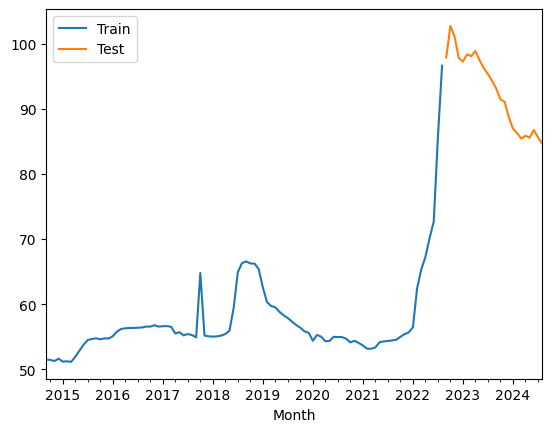

In [127]:
split = 24
y_train, y_test = train_test_split(y, split)
exog_train, exog_test = train_test_split(exog, split)

y_train.plot()
y_test.plot()
plt.legend(['Train', 'Test'])

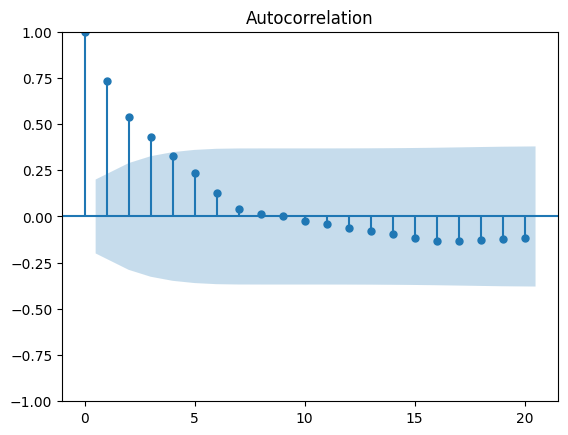

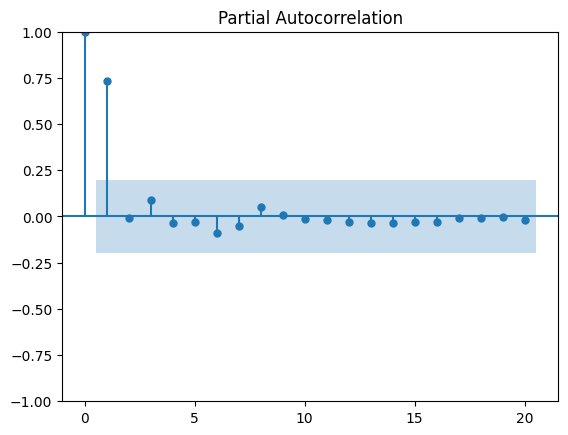

In [128]:
ACF_PACF(y_train, lags=20)

In [129]:
p = [1]
d = [1]
q = [1, 2, 3]

all, mape,aic, bic = Eval_possible_models(y_train, y_test, p, d, q, exog_train, exog_test)
all

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
0,ARIMAX,"(1, 1, 1)",35.699392,5.974897,4.416990,5.005952,442.802465,465.787357
1,ARIMAX,"(1, 1, 2)",311.057749,17.636829,15.975100,17.764341,439.994961,465.533730
2,ARIMAX,"(1, 1, 3)",225.592301,15.019730,13.843321,15.346382,442.722587,470.815233


In [130]:
mape

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
0,ARIMAX,"(1, 1, 1)",35.699392,5.974897,4.416990,5.005952,442.802465,465.787357
2,ARIMAX,"(1, 1, 3)",225.592301,15.019730,13.843321,15.346382,442.722587,470.815233
1,ARIMAX,"(1, 1, 2)",311.057749,17.636829,15.975100,17.764341,439.994961,465.533730


In [131]:
aic

,Model,Order,MSE,RMSE,MAE,MAPE,AIC,BIC
1,ARIMAX,"(1, 1, 2)",311.057749,17.636829,15.975100,17.764341,439.994961,465.533730
2,ARIMAX,"(1, 1, 3)",225.592301,15.019730,13.843321,15.346382,442.722587,470.815233
0,ARIMAX,"(1, 1, 1)",35.699392,5.974897,4.416990,5.005952,442.802465,465.787357


For ARIMA Vanilla


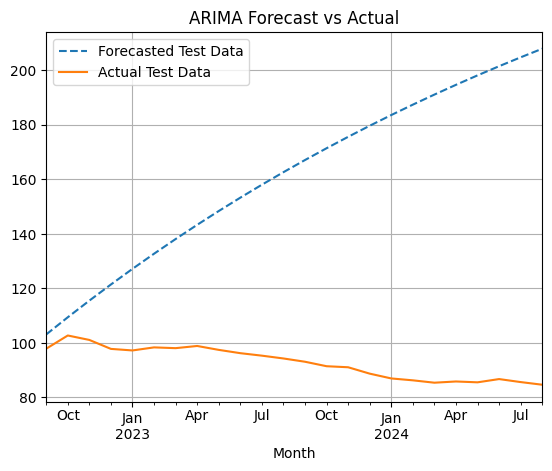

In [132]:
armmodel, armpred = Model(y_train, y_test, (1,1,1))

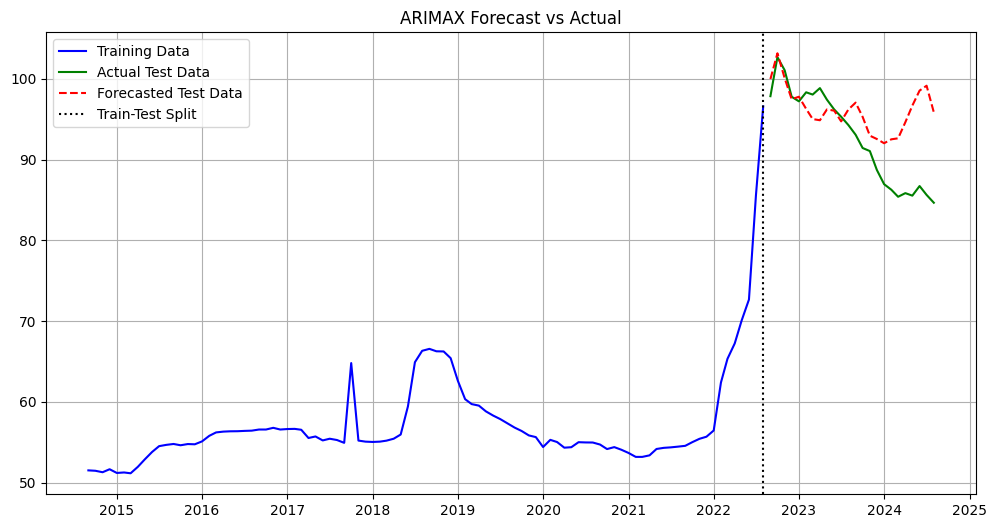

In [133]:
order = (1,1,1)
model, pred = Model(y_train, y_test, order, exog_train, exog_test)

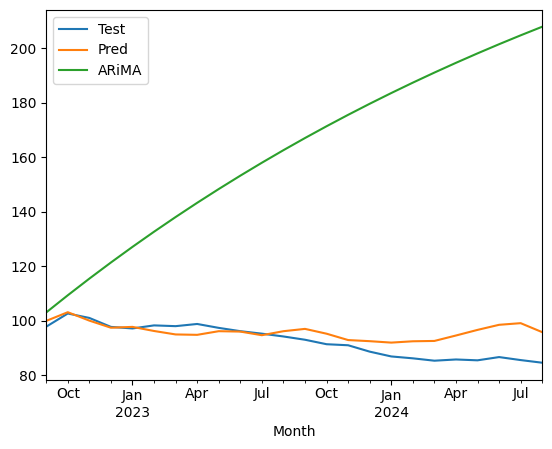

In [134]:
y_test.plot()
pred.plot()
armpred.plot()
plt.legend(['Test', 'Pred', 'ARiMA'])

In [135]:
combine = pd.concat([y_test, pred, armpred], axis=1)
combine.head(12)

,Price,Forecast,Forecast
2022-09-01,97.86,99.985537,103.084507
2022-10-01,102.70,103.173599,109.378176
2022-11-01,101.07,100.090927,115.477219
2022-12-01,97.79,97.482945,121.387653
2023-01-01,97.22,97.791056,127.115312
2023-02-01,98.34,96.288486,132.665848
2023-03-01,98.06,95.022715,138.044737
2023-04-01,98.86,94.878252,143.257288
2023-05-01,97.43,96.213911,148.308646
2023-06-01,96.22,96.070335,153.203794


In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   96
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -212.401
Date:                Wed, 07 May 2025   AIC                            442.802
Time:                        14:48:18   BIC                            465.787
Sample:                    09-01-2014   HQIC                           452.090
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Production      -1.6e-07   9.35e-07     -0.171      0.864   -1.99e-06    1.67e-06
Withdrawals    1.997e-07   9.71e-07      0.206      0.837    -1.7e-06     2.1e-06
GlobalPrice     -13.3788      0.001  -1.04e+04      0.000     -13.381     -13.376
ExchangeRate      1.4197      0.363      3.911      0.000       0.708       2.131
Precipitation     0.0037      0.003      1.215      0.224      -0.002       0.010
Inflation         0.8946      1.044      0.857      0.391      -1.151       2.940
ar.L1                  0      0.066          0      1.000      -0.128       0.128
ma.L1                 -0      0.066         -0      1.000      -0.128       0.128
sigma2            4.9362      0.400     12.336      0.000       4.152       5.720
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               616.48
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              11.22   Skew:                             2.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+18. Standard errors may be unstable.
"""

,lb_stat,lb_pvalue
1,0.540549,0.462205
2,0.651791,0.721881
3,0.932747,0.817519


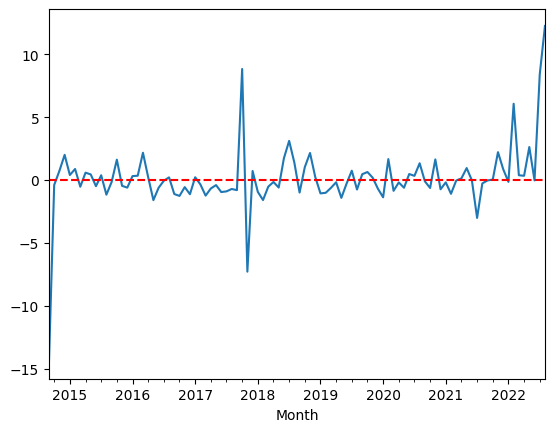

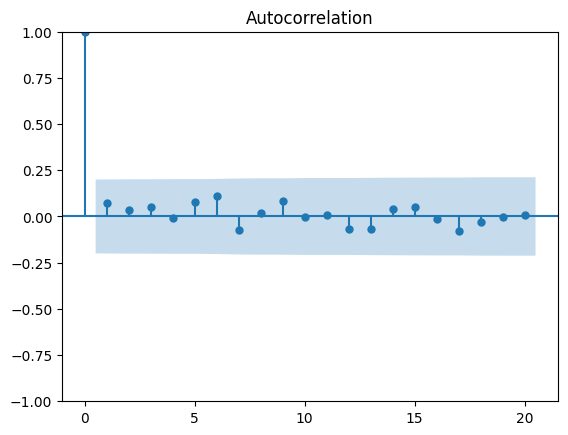

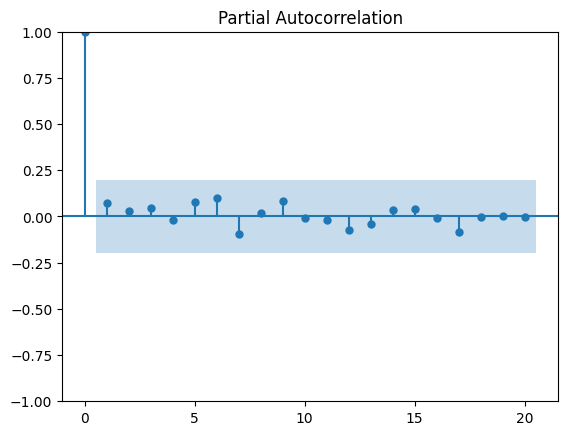

In [137]:
resid = Residuals(model)
ACF_PACF(resid, lags=20)
LjungBox(resid, lags=[1,2,3])

### Future and Beyond!


In [138]:
# Production
x1_order = (4,1,8) # 4,1,8
fx1, x1_model = Forecast(x1, x1_order, 36)
fx1

2024-09-01    8.279881e+05
2024-10-01    1.294413e+06
2024-11-01    1.725326e+06
2024-12-01    2.145409e+06
2025-01-01    2.406342e+06
2025-02-01    2.297567e+06
2025-03-01    2.115672e+06
2025-04-01    1.618850e+06
2025-05-01    1.139668e+06
2025-06-01    7.762636e+05
2025-07-01    4.874782e+05
2025-08-01    5.924113e+05
2025-09-01    8.197594e+05
2025-10-01    1.252312e+06
2025-11-01    1.777737e+06
2025-12-01    2.111334e+06
2026-01-01    2.379440e+06
2026-02-01    2.313414e+06
2026-03-01    2.032608e+06
2026-04-01    1.643942e+06
2026-05-01    1.111207e+06
2026-06-01    7.666039e+05
2026-07-01    5.451164e+05
2026-08-01    5.703508e+05
2026-09-01    8.828300e+05
2026-10-01    1.262638e+06
2026-11-01    1.769208e+06
2026-12-01    2.143486e+06
2027-01-01    2.321335e+06
2027-02-01    2.315111e+06
2027-03-01    2.001970e+06
2027-04-01    1.604024e+06
2027-05-01    1.136074e+06
2027-06-01    7.382211e+05
2027-07-01    5.826901e+05
2027-08-01    5.966281e+05
Freq: MS, Name: Forecast, dt

In [139]:
# Withdrawals
x2_order = (2,1,3)
fx2, x2_model = Forecast(x2, x2_order, 36)

In [140]:
# Global Price
x3_order = (2,1,3)
fx3, x3_model = Forecast(x3, x3_order, 36)

In [141]:
#exchangeRate
x4_order = (1,1,6) 
fx4, x4_model = Forecast(x4, x4_order, 36)

In [142]:
# Temperature1
x5_order = (7,1,8)
fx5, x4_model = Forecast(x5, x5_order, 36)

In [143]:
# Precipitation
x6_order = (5,1,11)
fx6, x6_model = Forecast(x6, x6_order, 36)

<Axes: >

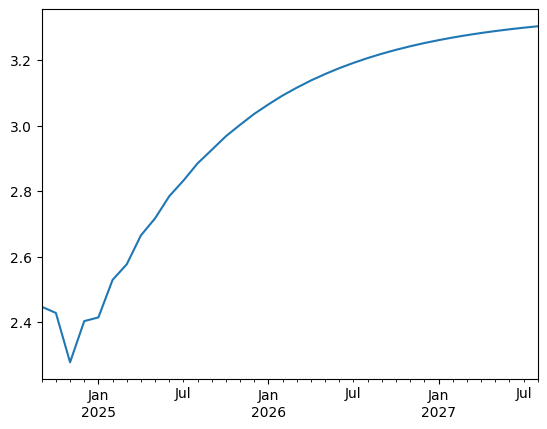

In [144]:
# Inflation
x7_order = (3,0,1) 
fx7, x7_model = Forecast(x7, x7_order, 36)
fx7.plot()


In [145]:
combined_forecast = pd.DataFrame({
    'Production': fx1,
    'Withdrawals': fx2,
    'GlobalPrice': fx3,
    'ExchangeRate': fx4,
    'Precipitation': fx6,
    'Temperature' : fx5,
    'Inflation': fx7
}, index=pd.date_range(start='2024-09-01', periods=36, freq='MS'))

# combined_forecast.to_csv('combined_forecast.csv', index=True)

### Future Price Forecast

In [146]:
future_df = pd.read_csv('combined_forecast.csv')
future_df.set_index('Month', inplace=True)

X1 = future_df['Production']
X2 = future_df['Withdrawals']
X3 = future_df['GlobalPrice']
X4 = future_df['ExchangeRate']
X6 = future_df['Precipitation']
X7 = future_df['Inflation']

future_exog = pd.concat([X1, X2, X3, X4, X6, X7], axis=1)
forecast_price, price_model = Forecast(y, (1,1,1), 36, exog=future_exog)
confidence = Confidence_intervals(price_model, 36, exog=future_exog)
Forecasted_plot(y, forecast_price, confidence.values)

2024-09-01    8.279881e+05
2024-10-01    1.294413e+06
2024-11-01    1.725326e+06
2024-12-01    2.145409e+06
2025-01-01    2.406342e+06
2025-02-01    2.297567e+06
2025-03-01    2.115672e+06
2025-04-01    1.618850e+06
2025-05-01    1.139668e+06
2025-06-01    7.762636e+05
2025-07-01    4.874782e+05
2025-08-01    5.924113e+05
2025-09-01    8.197594e+05
2025-10-01    1.252312e+06
2025-11-01    1.777737e+06
2025-12-01    2.111334e+06
2026-01-01    2.379440e+06
2026-02-01    2.313414e+06
2026-03-01    2.032608e+06
2026-04-01    1.643942e+06
2026-05-01    1.111207e+06
2026-06-01    7.666039e+05
2026-07-01    5.451164e+05
2026-08-01    5.703508e+05
2026-09-01    8.828300e+05
2026-10-01    1.262638e+06
2026-11-01    1.769208e+06
2026-12-01    2.143486e+06
2027-01-01    2.321335e+06
2027-02-01    2.315111e+06
2027-03-01    2.001970e+06
2027-04-01    1.604024e+06
2027-05-01    1.136074e+06
2027-06-01    7.382211e+05
2027-07-01    5.826901e+05
2027-08-01    5.966281e+05
Freq: MS, Name: Forecast, dt

In [147]:
forecast_price

KeyError: "None of ['Month'] are in the columns"